In [1]:
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import MultiprocessingEvaluator, ema_logging
import pickle

C:\Users\Marnix Verhagen\Anaconda\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


In [2]:
model, _ = get_model_for_problem_formulation(2)

In [3]:
from ema_workbench import Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

n_scenarios = 500 
n_policies = 50 
# In assignment 5 at first 1000 is used, but with only 10 policies. 
# We use 500 scenarios with 50 policies for PRIM. 
# For the dimensional stacking we use more scenarios to fill in the white blanks in the stacking outcomes.
# We use .... scenarios and .... policies for Dimensional Stacking

use_pickle1 = True 
#This is used to save time. Otherwise we need to re-run the MultiprocessingEvaluator every time.
# It is set on False when we re-runned the model for Dimensional Stacking.

if use_pickle1:
    with open('data/PRIM_results1.pickle','rb') as filehandler:
        results = pickle.load(filehandler)
else:
    with MultiprocessingEvaluator(model,n_processes=10) as evaluator:
        results = evaluator.perform_experiments(n_scenarios, n_policies, uncertainty_sampling=Samplers.LHS)
    
    with open('data/PRIM_results1.pickle',"wb") as filehandler:
        pickle.dump(results,filehandler)

In [4]:
experiments, outcomes = results

In [5]:
cleaned_experiments = experiments.drop(['policy','scenario','model'],axis=1)
# we drop 3 columns here

In [6]:
outcomesdataframe = pd.DataFrame.from_dict(outcomes)

In [7]:
outcomesdataframe.head()

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,2.736612e+06,8.062062e+08,800900000.0,188.709136,0.000160
1,8.559620e+07,8.062062e+08,800900000.0,4678.217820,0.007210
2,7.685857e+06,8.062062e+08,800900000.0,589.690134,0.001034
3,1.172449e+07,8.062062e+08,800900000.0,554.752950,0.000964
4,0.000000e+00,8.062062e+08,800900000.0,0.000000,0.000000


In [8]:
import numpy as np

data = (outcomes['Expected Number of Deaths'] <= 0.001) # Set a maximum value on Expected number of deaths
y = data
# First I used this: y = data < np.percentile(data,50) #median, everything under the 50%

In [10]:
#threshold (float) – the density threshold that a box has to meet
#Not sure which tresholds we need to use?
prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8, peel_alpha=0.05) #Default of PRIM sets mass_min and peel_alpha also on 0.05
box1 = prim_alg.find_box()

[MainProcess/INFO] 25000 points remaining, containing 12054 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05376, coverage: 0.11149825783972125, density: 1.0 restricted_dimensions: 15


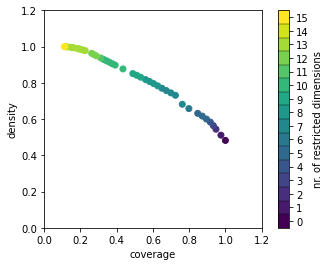

In [11]:
box1.show_tradeoff()
plt.show()

coverage    0.798490
density     0.657895
id          8.000000
mass        0.585200
mean        0.657895
res_dim     6.000000
Name: 8, dtype: float64

                       box 8                                           
                         min        max                       qp values
A.5_DikeIncrease 0  0.500000  10.000000   [2.580492588204586e-28, -1.0]
A.5_pfail           0.099914   0.998179  [1.1496326096412377e-23, -1.0]
A.3_pfail           0.097263   0.998670  [1.4656865076221269e-21, -1.0]
A.3_DikeIncrease 0  0.500000  10.000000  [2.4556544874100797e-16, -1.0]
A.1_DikeIncrease 2  0.500000  10.000000  [1.8167011057095706e-11, -1.0]
A.2_pfail           0.045542   0.998589   [8.952630647836544e-07, -1.0]



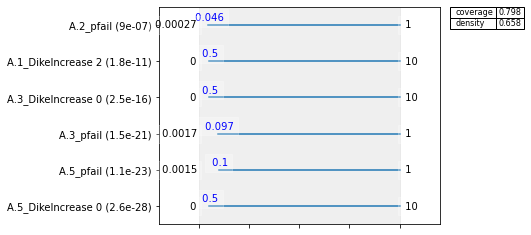

In [19]:
box1.inspect(8)  #Looking at the outcome above, the 8th dot seems to meet the best combination of coverage & density
box1.inspect(8, style='graph')
plt.show()

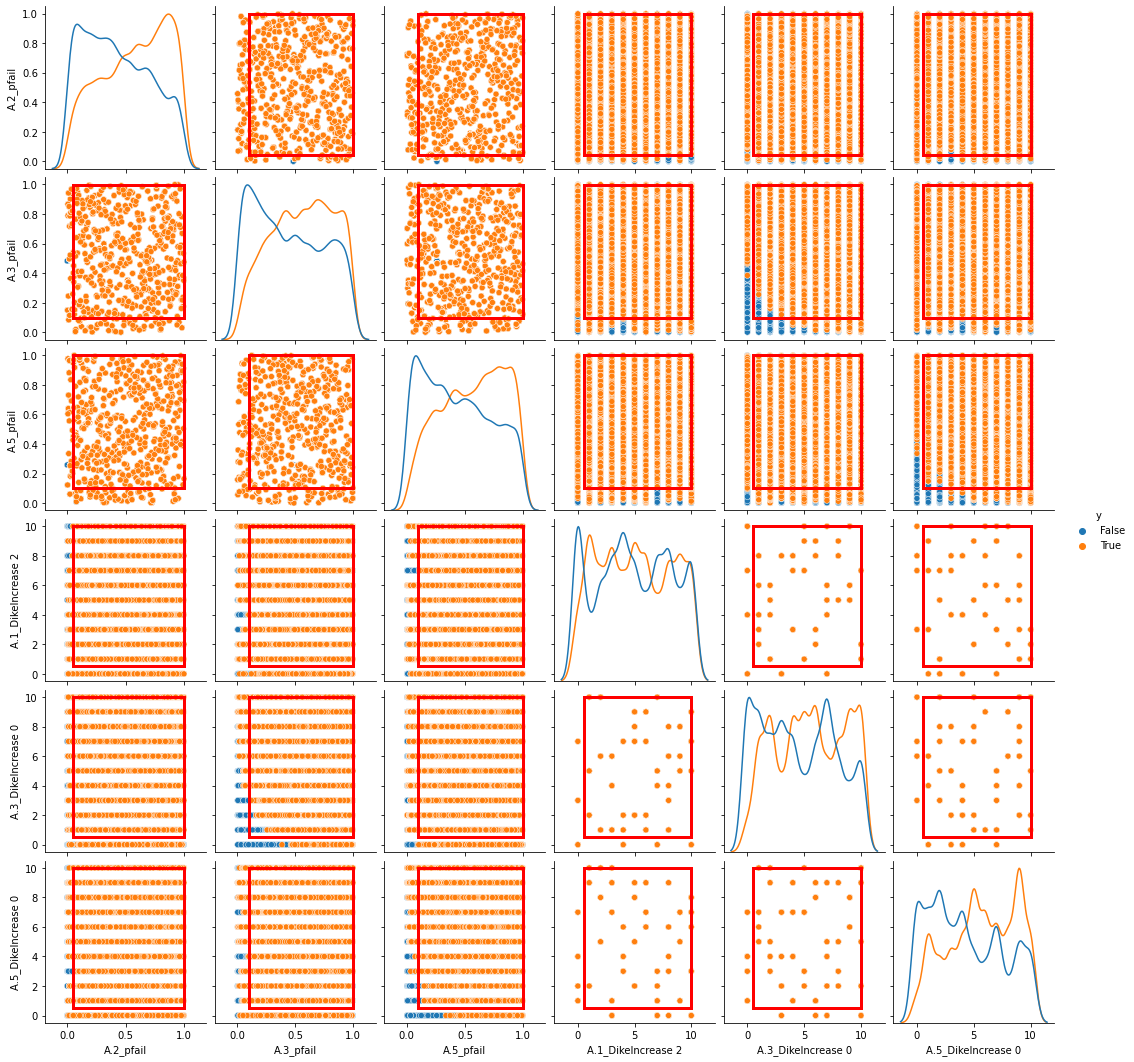

In [20]:
box1.show_pairs_scatter(8)
plt.show()

In [21]:
from ema_workbench.analysis import dimensional_stacking

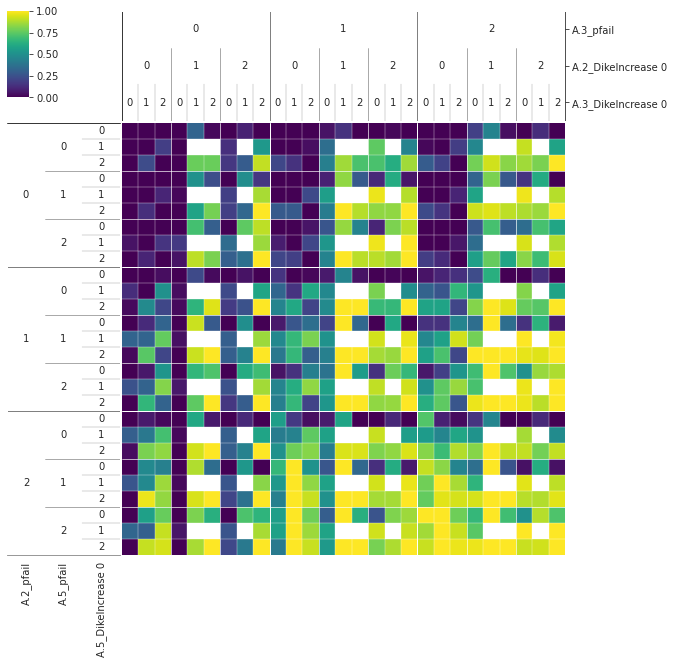

In [22]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()